In [14]:
import cv2
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from joblib import dump
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
LABEL_MAP = {"Airplane": 0, "Bicycle": 1, "Butterfly": 2, "Car": 3, "Flower": 4, "House": 5, "Ladybug": 6, "Train": 7, "Tree": 8, "Whale": 9}
IMAGE_SIZE = (128,128)
DATA_DIR = "../../data"

## Setup dataset

In [8]:
# Load the image data and set labels
categories = os.listdir(DATA_DIR)
labels = []
images = []

for category in categories:
    category_path = os.path.join(DATA_DIR, category)
    for image_name in os.listdir(category_path):
        image_path = os.path.join(category_path, image_name)
        image = cv2.imread(image_path, cv2.IMREAD_COLOR)
        image = cv2.resize(image, IMAGE_SIZE)
        images.append(image.flatten())
        labels.append(categories.index(category))

X = np.array(images)
y = np.array(labels)


## Create the SVM

In [9]:
#Get Training and Testing splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train SVM classifier
svm_model = SVC(kernel='rbf', gamma='scale', decision_function_shape='ovo')
svm_model.fit(X_train, y_train)

SVC(decision_function_shape='ovo')

In [11]:
# Make predictions and evaluate the model
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.45      0.29      0.36        17
           1       0.29      0.73      0.41        11
           2       0.60      0.21      0.32        14
           3       1.00      0.22      0.36        27
           4       0.26      0.64      0.38        14
           5       0.40      0.29      0.33        14
           6       0.50      0.31      0.38        16
           7       0.38      0.78      0.51        18
           8       0.18      0.15      0.17        13
           9       0.50      0.28      0.36        18

    accuracy                           0.38       162
   macro avg       0.46      0.39      0.36       162
weighted avg       0.50      0.38      0.36       162



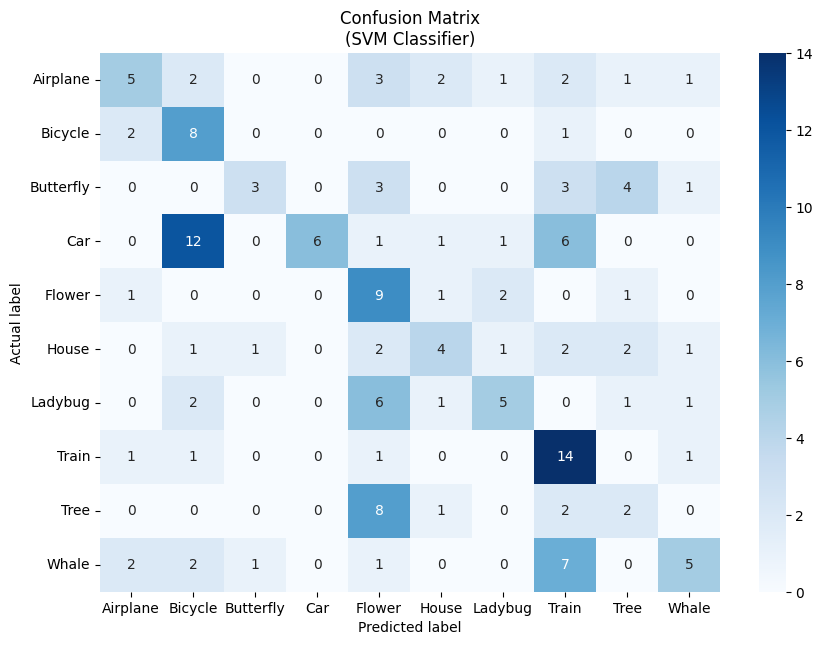

In [21]:
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", yticklabels=categories, xticklabels=categories)
plt.title("Confusion Matrix\n(SVM Classifier)")
plt.ylabel("Actual label")
plt.xlabel("Predicted label")
plt.show()

## Save Model

In [13]:
dump(svm_model, '../../saved_models/svm_model.joblib')

# (This model is 247MB, so it is gitignored)

['../../saved_models/svm_model.joblib']